## Sentiment Mining of Online Reviews Using Machine Learning Algorithms

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the Data

In [2]:
df=pd.read_csv('C:/Users/HP/Downloads/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv (1)/amazon 1.csv')

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [5]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [7]:
df.shape

(28332, 24)

## Catplot

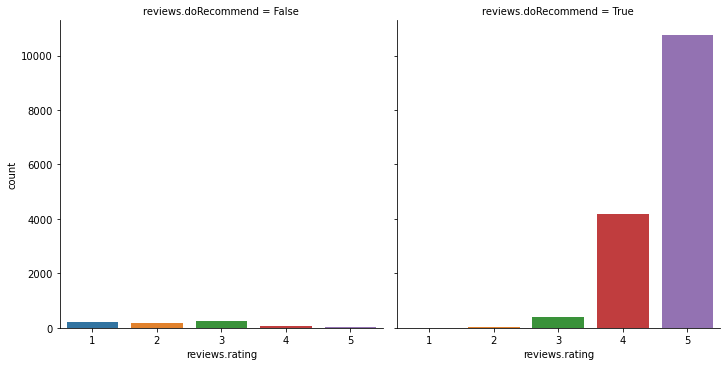

In [8]:
sns.catplot(x= 'reviews.rating', col= 'reviews.doRecommend', data= df, kind= 'count')

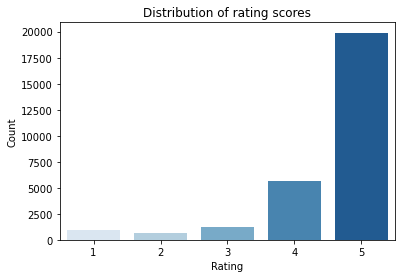

In [9]:
# distribution of rating
sns.countplot(df['reviews.rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [10]:
##Since we are interested in sentiment analysis, we will only use those columns
df=df[['reviews.text','reviews.rating']]

In [11]:
df

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5
...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,5
28328,I bought this for my niece for a Christmas gif...,4
28329,"Very nice for light internet browsing, keeping...",5
28330,This Tablet does absolutely everything I want!...,5


## Checking for null values

In [12]:
df.isnull().sum()
# here dont have null values

reviews.text      0
reviews.rating    0
dtype: int64

In [13]:
#check unique values in rating column
df['reviews.rating'].unique()

array([3, 4, 5, 1, 2], dtype=int64)

## Change the rating into positive and negative

In [14]:
#change the rating into positive and negative
clean_rating = {'reviews.rating' : {5 : "pos", 4 : "pos", 3 : "pos", 2 : "neg", 1 : "neg"}}
df.replace(clean_rating,inplace=True)
df

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,pos
1,Bulk is always the less expensive way to go fo...,pos
2,Well they are not Duracell but for the price i...,pos
3,Seem to work as well as name brand batteries a...,pos
4,These batteries are very long lasting the pric...,pos
...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,pos
28328,I bought this for my niece for a Christmas gif...,pos
28329,"Very nice for light internet browsing, keeping...",pos
28330,This Tablet does absolutely everything I want!...,pos


In [15]:
#value counts of positive and negative class
(df['reviews.rating']).value_counts()

pos    26751
neg     1581
Name: reviews.rating, dtype: int64

## Pie chart

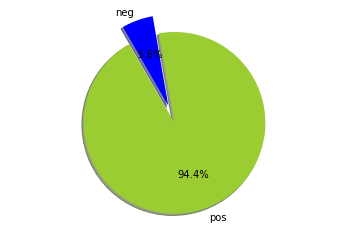

In [16]:
#visualize the positive and negative class
labels = 'pos', 'neg'
sizes = [26751,1581] 
colors = ['yellowgreen', 'blue'] 
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=120) 
plt.axis('equal') 
plt.show()

In [17]:
all_words = pd.Series(' '.join(df['reviews.text']).split())

In [18]:
all_words

0               I
1           order
2               3
3              of
4            them
           ...   
735069         to
735070     anyone
735071         on
735072          a
735073    budget.
Length: 735074, dtype: object

##   WordCloud

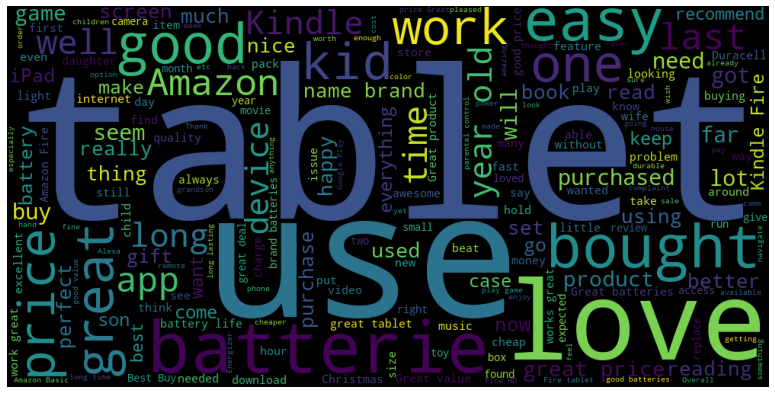

In [19]:
##  Visualization of most frequent word using worldcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))
plt.figure(figsize = (15,7))
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

## get words used positive reviews

In [20]:
# get words used positive reviews 
positiveWords = pd.Series(' '.join(df[df['reviews.rating']=='pos']['reviews.text']).split())

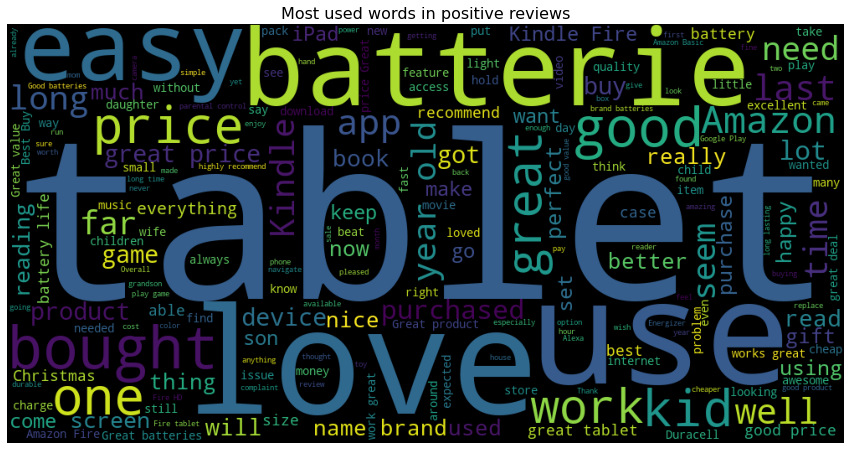

In [21]:
# plot positiveword word cloud
wordcloud1 = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud1)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

## get words used negative reviews

In [22]:
# get words used negative reviews 
negativewords = pd.Series(' '.join(df[df['reviews.rating']=='neg']['reviews.text']).split())

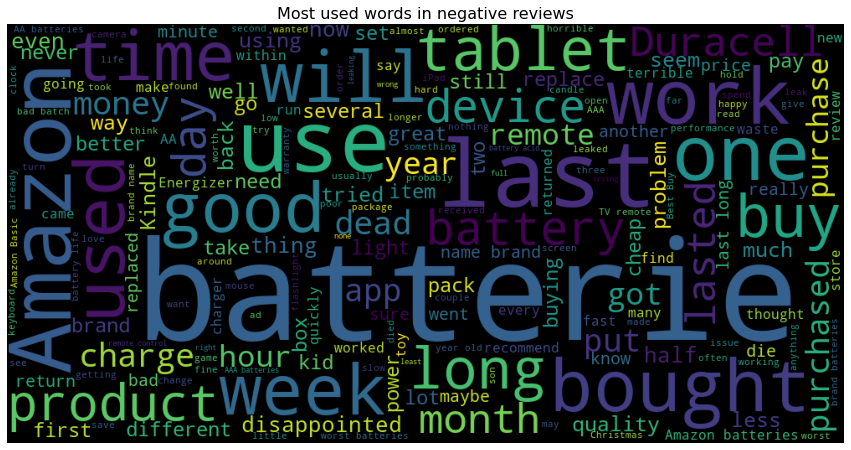

In [23]:
# plot negative word cloud
wordcloud2 = WordCloud(width = 1000, height = 500).generate(' '.join(negativewords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud2)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [24]:
df

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,pos
1,Bulk is always the less expensive way to go fo...,pos
2,Well they are not Duracell but for the price i...,pos
3,Seem to work as well as name brand batteries a...,pos
4,These batteries are very long lasting the pric...,pos
...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,pos
28328,I bought this for my niece for a Christmas gif...,pos
28329,"Very nice for light internet browsing, keeping...",pos
28330,This Tablet does absolutely everything I want!...,pos


In [25]:
review_text=df['reviews.text']
review_text

0        I order 3 of them and one of the item is bad q...
1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: reviews.text, Length: 28332, dtype: object

## Text Processing
1. Clean Text:
    Clean and prepare text data for modeling with machine learning
2. Remove Stopwords:
    There can be some words in our sentences that occur very frequently and don't contribute too much to the overall meaning of the sentences. We usually have a list of these words and remove them from each our sentences. For example: "a", "an", "the", "this", "that", "is", "it", "to", "and" in this example.


In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
wordnet=WordNetLemmatizer()
corpus = []
for i in range(0, len(review_text)):
    review = re.sub('[^a-zA-Z]', ' ', review_text[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

## Create TF-IDF:
    TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [27]:
#change the words into vector
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=1000)
X = tf.fit_transform(corpus).toarray()

In [28]:
X.shape

(28332, 1000)

In [29]:
tf_df = pd.DataFrame(X, columns=tf.get_feature_names())

In [30]:
tf_df

,aa,aaa,ability,able,absolutely,access,accidentally,account,activity,actually,...,xbox,xmas,year,yes,yet,yo,young,younger,youtube,yr
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.604168
28328,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333024,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28329,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28330,0.0,0.0,0.0,0.0,0.213254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Handling Imbalance Data

In [31]:
y=df['reviews.rating']

In [32]:
y=df['reviews.rating']
y.value_counts()

pos    26751
neg     1581
Name: reviews.rating, dtype: int64

In [33]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
random=RandomOverSampler()

In [34]:
random_x,random_y=random.fit_resample(X,y)

## Splitting Dataset into Train and Test Set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(random_x,random_y, test_size=0.33, random_state=0)

## Modelling the data

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

1.Naive Bayes classifier

accuracy:   0.875
Confusion matrix, without normalization


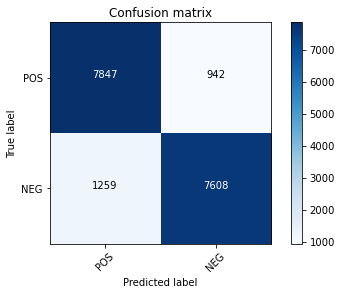

In [39]:
from sklearn import metrics
import itertools
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['POS', 'NEG'])

2.Randomforest Classifier

accuracy:   0.985
Confusion matrix, without normalization


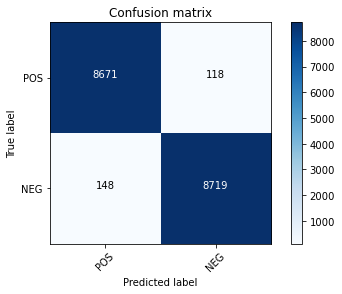

In [40]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(X_train,y_train)
pred = rand.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['POS', 'NEG'])

3.Svm Classifier

accuracy:   0.937
Confusion matrix, without normalization


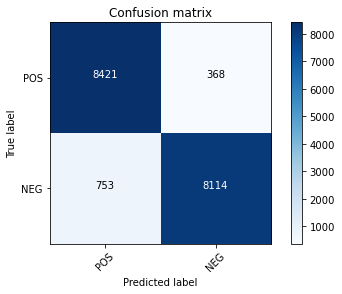

In [41]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['POS', 'NEG'])